In [5]:
# Importando dependências

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [8]:
# Carregando os dados de treino e teste

(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

In [15]:
# Exibindo como estão os dados

# Quantas imagens para treino?
print("Imagens de Treino:", len(x_treino))

# Quantas imagens para teste?
print("Imagens de Teste:", len(x_teste))

# Qual o formato de uma imagem?
print("Formato da imagem:", x_treino[0].shape)

# O que a imagem x_treino[0] representa?
print("Representação da imagem x_treino[0]:", y_treino[0])

# Como são os dados de uma imagem?
print("Dados da imagem:", x_treino[0])

Imagens de Treino: 60000
Imagens de Teste: 10000
Formato da imagem: (28, 28)
Representação da imagem x_treino[0]: 5
Dados da imagem: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 25

Digite um número válido entre 0 e 5999915432
Essa imagem representa: 4


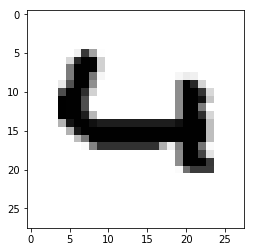

In [25]:
# Exibindo a imagem

import matplotlib.pyplot as plt

# Configuração para o jupyter notebook exibir a imagem corretamente
%matplotlib inline

indice = 0

# Se quiser perguntar para o usuário um número de índice:
#indice = int(input("Digite um número válido entre 0 e 59999: "))

print("Essa imagem representa:", y_treino[indice])
plt.imshow(x_treino[indice], cmap=plt.cm.binary)
plt.show()

In [27]:
# Achatando as matrizes de pixels e transformando em uma única lista com valores

quantidade_treino = len(x_treino) # Vai me trazer 60000
quantidade_teste = len(x_teste) # Vai me trazer 10000

tamanho_imagem = x_treino[0].shape # Vai me trazer (28, 28)
tamanho_total = tamanho_imagem[0] * tamanho_imagem[1] # Vai me trazer 784

x_treino = x_treino.reshape(quantidade_treino, tamanho_total)
x_teste = x_teste.reshape(quantidade_teste, tamanho_total)

In [30]:
# Visualizar dados achatados

print("Novo formato dos dados:", x_treino[0].shape)
print(x_treino[0])

Novo formato dos dados: (784,)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198

In [34]:
# Normalização dos dados

# Converte todos os valores de int8 para float32
x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')

# Valores entre 0 e 255 ficarão entre 0 e 1
x_treino /= 255
x_teste /= 255

In [35]:
# Visualizando os dados normalizados

print("Dados normalizados")
print(x_treino[0])

Dados normalizados
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0. 

In [42]:
# Transformando y_treino e y_teste para variáveis categóricas

valores_unicos = set(y_treino) # Irá me trazer os itens únicos: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
qtde_valores_unicos = len(valores_unicos) # Irá me trazer que são 10 itens únicos
print("Quantidade de Valores Únicos em y_treino:", qtde_valores_unicos)

# O que temos em y_treino[0]?
print("y_treino[0] antes:", y_treino[0])

# Transforma 1 em [0, 1, 0, 0, 0, 0, 0, 0, 0], 2 em [0, 0, 1, 0, 0, 0, 0, 0, 0] e assim por diante
y_treino = keras.utils.to_categorical(y_treino, qtde_valores_unicos)
y_teste = keras.utils.to_categorical(y_teste, qtde_valores_unicos)

# Como ficou y_treino[0] depois da transformação?
print("y_treino[0] depois:", y_treino[0])

Quantidade de Valores Únicos em y_treino: 10
y_treino[0] antes: 5
y_treino[0] depois: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [45]:
# Criando o modelo

model = Sequential()

# Primeira hidden layer com 30 neurônios, com função de ativação ReLU
# Na primeira camada, precisamos definir o input shape, que no caso será (784,)
model.add(Dense(30, activation='relu', input_shape=(tamanho_total,)))

# Adicionamos um regularizador. No caso, será um Dropout
model.add(Dropout(0.2))

# Segunda hidden layer com 20 neurônios, com função de ativação ReLU
model.add(Dense(20, activation='relu'))

# Mais um regularizador depois da segunda hidden layer
model.add(Dropout(0.2))

# Finalizamos com a camada de output, com a quantidade de valores únicos (no caso 10) e uma
# função de ativação Softmax
model.add(Dense(qtde_valores_unicos, activation='softmax'))

# Exibimos o resumo do modelo criado
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                23550     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________

In [46]:
# Compila o modelo criado

model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])

In [47]:
# Treina o modelo

history = model.fit(x_treino, y_treino,
                   batch_size=128,
                   epochs=10,
                   verbose=1,
                   validation_data=(x_teste, y_teste))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.8731 - acc: 0.7285 - val_loss: 0.2990 - val_acc: 0.9142
Epoch 2/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.4499 - acc: 0.8655 - val_loss: 0.2306 - val_acc: 0.9315
Epoch 3/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.3823 - acc: 0.8878 - val_loss: 0.2054 - val_acc: 0.9393
Epoch 4/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.3408 - acc: 0.9008 - val_loss: 0.1943 - val_acc: 0.9422
Epoch 5/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.3140 - acc: 0.9093 - val_loss: 0.1834 - val_acc: 0.9478
Epoch 6/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.3008 - acc: 0.9135 - val_loss: 0.1790 - val_acc: 0.9496
Epoch 7/10
60000/60000 [==============================] - 1s 15us/step - loss: 0

Valor em y_teste[indice] [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Previsão: [[8.9865011e-07 1.4739011e-07 1.0730946e-06 6.9979633e-06 7.3206765e-03
  2.1834157e-05 1.6330453e-08 3.7525103e-03 4.9434971e-07 9.8889530e-01]]
Previsão (ajustada): [9]


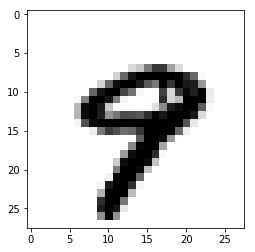

In [52]:
# Fazendo nossas previsões

indice = 9

# Qual o valor categórico de y_teste[indice]?
print("Valor em y_teste[indice]", y_teste[indice])
# y_teste[indice] irá me trazer [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.], por tanto, deve ser um 7

# Reajustando a imagem em x_teste[indice]
imagem = x_teste[indice].reshape((1, tamanho_total))

# Fazendo minha previsão
prediction = model.predict(imagem) # Irá retornar os valores de cada posição do output
print("Previsão:", prediction)

# Ajustando a previsão para o número real
prediction_class = model.predict_classes(imagem)
print("Previsão (ajustada):", prediction_class)

(x_treino_img, y_treino_img), (x_teste_img, y_teste_img) = mnist.load_data()
plt.imshow(x_teste_img[indice], cmap=plt.cm.binary)